<a href="https://colab.research.google.com/github/JD004/EnglishtoFrench-Translation/blob/main/Arrthmiya_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy pandas wfdb matplotlib scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 74.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 3D scatter plot
import matplotlib as mpl
from mpl_toolkits import mplot3d

import itertools
from collections import Counter

## The native Python waveform-database (WFDB) package.
## A library of tools for reading, writing, and processing WFDB signals and annotations.
import wfdb
import random
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,auc, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving SHA256SUMS.txt to SHA256SUMS (1).txt
Saving RECORDS to RECORDS (1)
Saving ANNOTATORS to ANNOTATORS (1)
Saving 234.xws to 234 (1).xws
Saving 234.hea to 234 (1).hea
Saving 234.dat to 234 (1).dat
Saving 234.atr to 234 (1).atr
Saving 233.xws to 233 (1).xws
Saving 233.hea to 233 (1).hea
Saving 233.dat to 233 (1).dat
Saving 233.atr to 233 (1).atr
Saving 232.xws to 232 (1).xws
Saving 232.hea to 232 (1).hea
Saving 232.dat to 232 (1).dat
Saving 232.atr to 232 (1).atr
Saving 231.xws to 231 (1).xws
Saving 231.hea to 231 (1).hea
Saving 231.dat to 231 (1).dat
Saving 231.atr to 231 (1).atr
Saving 230.xws to 230 (1).xws
Saving 230.hea to 230 (1).hea
Saving 230.dat to 230 (1).dat
Saving 230.atr to 230 (1).atr
Saving 228.xws to 228 (1).xws
Saving 228.hea to 228 (1).hea
Saving 228.dat to 228 (1).dat
Saving 228.atr to 228 (1).atr
Saving 223.xws to 223 (1).xws
Saving 223.hea to 223 (1).hea
Saving 223.dat to 223 (1).dat
Saving 223.atr to 223 (1).atr
Saving 222.xws to 222 (1).xws
Saving 222.hea to 22

In [ ]:
pts=[str(x) for x in range(100,125)]+[str(x) for x in range(200,224)]+[str(x) for x in range(228,235)]
for x in ["110","120","204","206","211","216","218","229"]:
    pts.remove(x)

print("Number of cases: ", len(pts))
print(pts)

Number of cases:  48
['100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '111', '112', '113', '114', '115', '116', '117', '118', '119', '121', '122', '123', '124', '200', '201', '202', '203', '205', '207', '208', '209', '210', '212', '213', '214', '215', '217', '219', '220', '221', '222', '223', '228', '230', '231', '232', '233', '234']


In [ ]:
# Define the path to your data directory
data_path = "/content/" # Replace with the actual path to your WFDB data

syms = [wfdb.rdann(data_path + pt,"atr").symbol for pt in pts]
syms = list(itertools.chain(*syms))
final_dict=dict(Counter(syms))
final_dict

{'+': 1291,
 'N': 75052,
 'A': 2546,
 'V': 7130,
 '~': 616,
 '|': 132,
 'Q': 33,
 '/': 7028,
 'f': 982,
 'x': 193,
 'F': 803,
 'j': 229,
 'L': 8075,
 'a': 150,
 'J': 83,
 'R': 7259,
 '[': 6,
 '!': 472,
 ']': 6,
 'E': 106,
 'S': 2,
 '"': 437,
 'e': 16}

In [ ]:
final_dict=dict()
for pt in pts:
    d=dict()
    file=data_path+pt
    annotation=wfdb.rdann(file,"atr")
    syms=annotation.symbol
    for sym in syms:
        d[sym]=d.get(sym,0)+1
    for k,v in d.items():
        if k not in final_dict.keys():
            final_dict[k]=v
        else:
            final_dict[k]=final_dict[k]+v

pd.Series(final_dict).sort_values(ascending=False)

,0
N,75052
L,8075
R,7259
V,7130
/,7028
A,2546
+,1291
f,982
F,803
~,616


In [ ]:
nonbeats=["[","]","!","x","(",")","p","t","u","`",
          "\"","^","|","~","+","s","T","*","D","=","@","Q","?"]
abnormals=["L","R","V","/","A","f","F","j","a","E","J","e","S"]

agg=nonbeats+abnormals

In [ ]:
cat={"non_beats":0,"abnormal":0,"normal":0}
for k,v in final_dict.items():
    if k in nonbeats:
        cat["non_beats"]=cat["non_beats"]+v
    elif k in abnormals:
        cat["abnormal"]=cat["abnormal"]+v
    else:
        cat["normal"]=cat["normal"]+v

pd.Series(cat).sort_values(ascending=False)

,0
normal,75052
abnormal,34409
non_beats,3186


In [ ]:
def load_ecg(file):
    # load the ecg
    # example: "mit-bih-arrhythmia-database-1.0.0/101"
    record=wfdb.rdrecord(file)
    # load the annotation
    annotation=wfdb.rdann(file,"atr")
    # extract the signal
    p_signal=record.p_signal
    # verify frequency is 360
    assert record.fs ==360, "sample freq is not 360"

    # extract symbols and annotation index
    atr_sym=annotation.symbol
    atr_sample=annotation.sample

    return p_signal,atr_sym,atr_sample

In [ ]:
file=data_path+pts[0]
p_signal,atr_sym,atr_sample=load_ecg(file)


In [ ]:
ab_index=[]
for sym,ind in zip(atr_sym,atr_sample):
    if sym in abnormals:
        ab_index.append(ind)

## list of normal beats index
nor_index=[]
for sym,ind in zip(atr_sym,atr_sample):
    if sym not in agg:
        nor_index.append(ind)

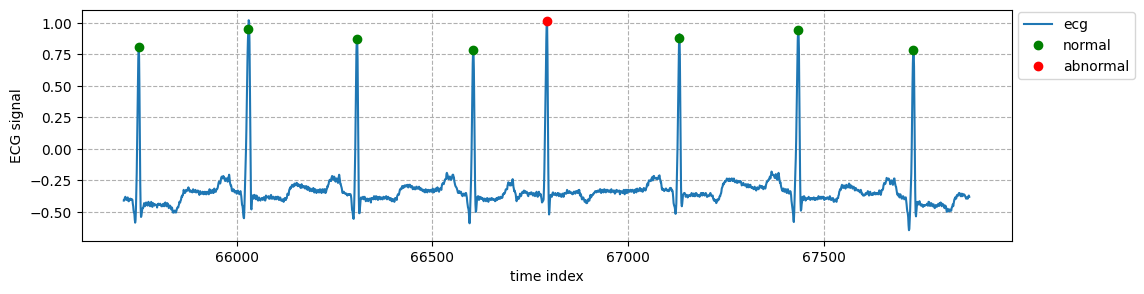

In [ ]:
T=range(len(p_signal))
left=int(ab_index[1]-360*3)  ## 3 seconds before
right=int(ab_index[1]+360*3) ## 3 seconds after
interval=T[left:right]

def subset(ls,interval):
    d=[]
    for x in ls:
        if x in interval:
            d.append(x)
    sig=[p_signal[t,0] for t in d]
    return(d,sig)

plt.figure(figsize=(12,3))
plt.plot(interval,p_signal[left:right,0],label="ecg")
plt.plot(subset(nor_index,interval)[0],subset(nor_index,interval)[1],"o",label="normal",color="g")
plt.plot(subset(ab_index,interval)[0],subset(ab_index,interval)[1],"o",color="r",label="abnormal");
plt.xlabel("time index")
plt.ylabel("ECG signal")
plt.grid(linestyle="--")
plt.legend(bbox_to_anchor=(1, 1.02));

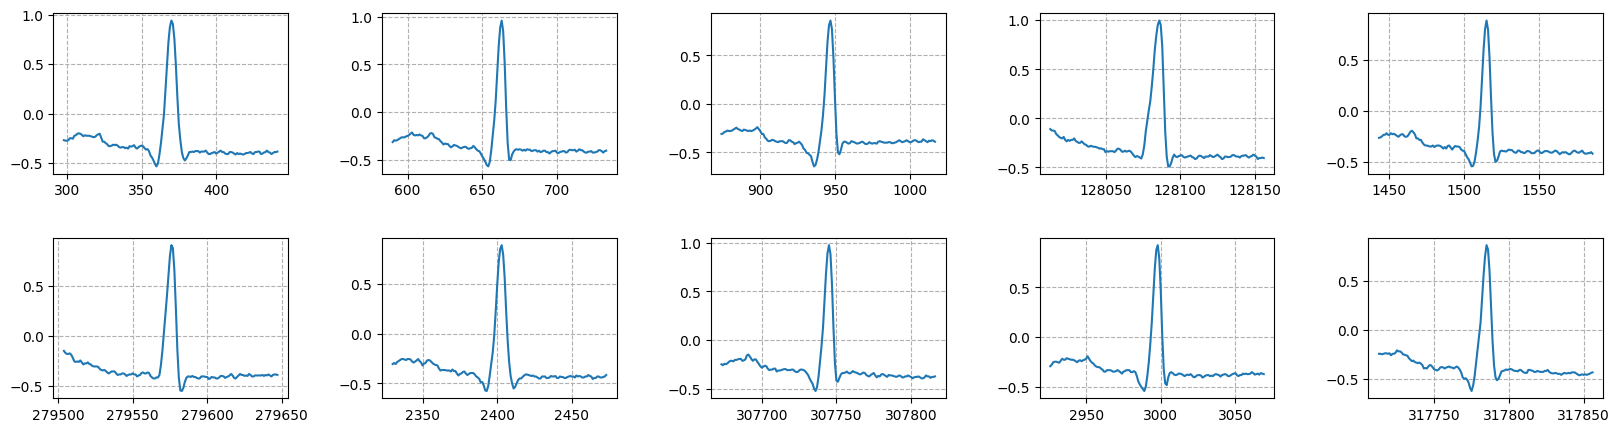

In [ ]:
fs=360
num_sec=0.2
fig = plt.figure(figsize=(20,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 11):
    ax = fig.add_subplot(2, 5, i)
    ## random choice between normal and abnormal
    rand=random.choice((ab_index,nor_index))
    left=int(rand[i]-fs*num_sec)  ## .2 seconds before
    right=int(rand[i]+fs*num_sec) ## .2 seconds after
    interval=T[left:right]
    ax.plot(interval,p_signal[left:right,0])
    plt.grid(linestyle="--")

In [ ]:
def make_dataset(pts,num_sec,fs):
    """
    function for extracting normal and abnormal beats
    input:
    pts: list of patients
    num_sec= number of seconds for including before and after the beat
    fs= frequency
    output:
    X_all=signal within the time window of 2*num_sec
    Y_all=binary, 0: normal, 1:abnormal
    sym_all=beat annotation symbol
    patient_id= patient id
    """
    num_cols=int(2*num_sec *fs)
    X_all=np.zeros((1,num_cols))
    Y_all=np.zeros((1,1))
    sym_all=[]
    patient_id=[]

    max_rows=[]
    for pt in pts:
        file=data_path+pt
        p_signal,atr_sym,atr_sample=load_ecg(file)
        p_signal=p_signal[:,0]

        df_ann=pd.DataFrame({"atr_sym":atr_sym,"atr_sample":atr_sample})
        df_ann=df_ann.loc[df_ann.atr_sym.isin(abnormals+["N"])]

        num_rows=len(df_ann)

        X=np.zeros((num_rows,num_cols))
        Y=np.zeros((num_rows,1))

        max_row=0
        for atr_sample,atr_sym in zip(df_ann.atr_sample.values,df_ann.atr_sym.values):
            left=max([0,(atr_sample-int(num_sec*fs))])
            right=min([len(p_signal),(atr_sample+int(num_sec*fs))])
            x=p_signal[left:right]
            if len(x)== num_cols:
                X[max_row,:]=x
                Y[max_row,:]=int(atr_sym in abnormals)
                sym_all.append(atr_sym)
                patient_id.append(pt)
                max_row +=1
        X = X[:max_row,:]
        Y = Y[:max_row,:]
        max_rows.append(max_row)
        X_all = np.append(X_all,X,axis = 0)
        Y_all = np.append(Y_all,Y,axis = 0)

    # drop the first zero row
    X_all = X_all[1:,:]
    Y_all = Y_all[1:,:]
    # check sizes make sense
    assert np.sum(max_rows) == X_all.shape[0], 'number of rows messed up'
    assert Y_all.shape[0] == X_all.shape[0], 'number of rows messed up'
    assert Y_all.shape[0] == len(sym_all), 'number of rows messed up'

    return X_all, Y_all, sym_all, patient_id

In [ ]:
X, Y, sym, patient=make_dataset(pts,num_sec=.2,fs=360)

In [ ]:
print(X.shape)
Y.shape

(109443, 144)


(109443, 1)

In [ ]:
Y_list=Y.flatten().tolist()
## index of abnormal beats
ind_ab=[i for i, e in enumerate(Y_list) if e == 1]

## patient with abnormal beats
pwab={}
for x in [patient[i] for i in ind_ab]:
    pwab[x]=pwab.get(x,0)+1

print(pwab)
#q3=np.quantile([v for k, v in pwab.items()],.75)

#[k for k, v in pwab.items() if v > q3]

{'100': 34, '101': 3, '102': 2088, '103': 2, '104': 2048, '105': 41, '106': 520, '107': 2137, '108': 24, '109': 2531, '111': 2124, '112': 2, '113': 6, '114': 59, '116': 110, '117': 1, '118': 2277, '119': 444, '121': 2, '123': 3, '124': 1619, '200': 858, '201': 338, '202': 75, '203': 447, '205': 85, '207': 1859, '208': 1366, '209': 384, '210': 227, '212': 1825, '213': 610, '214': 2259, '215': 168, '217': 1964, '219': 72, '220': 94, '221': 396, '222': 421, '223': 576, '228': 365, '230': 1, '231': 1257, '232': 1780, '233': 848, '234': 53}


In [ ]:
d={}
for x in sym:
    d[x]=d.get(x,0)+1
print(d)

{'N': 75040, 'A': 2546, 'V': 7129, '/': 7028, 'f': 982, 'F': 802, 'j': 229, 'L': 8073, 'a': 150, 'J': 83, 'R': 7257, 'E': 106, 'S': 2, 'e': 16}


In [ ]:
pca=decomposition.PCA()
pca.fit(X)

PCA()

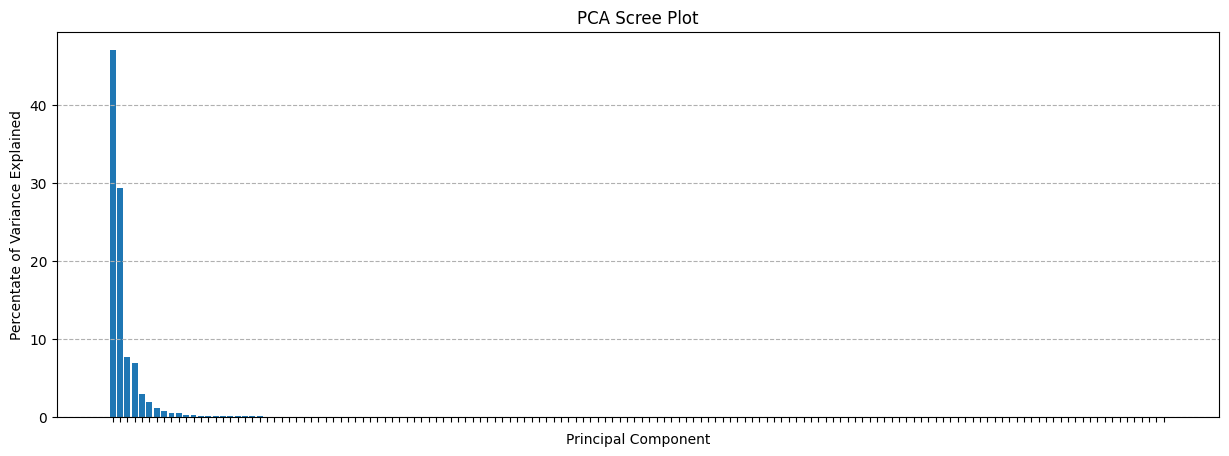

In [ ]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ["PC%d"%(i+1) for i in range(0,X.shape[1])]
plt.figure(figsize=(15, 5))
plt.bar(x= range(0,X.shape[1]), height=percent_variance, tick_label="")
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.grid(linestyle="--",axis="y");

Cummulative varienec explained of the first 10 componants: 
 [47.01 76.35 84.05 90.89 93.77 95.69 96.83 97.59 98.11 98.53]


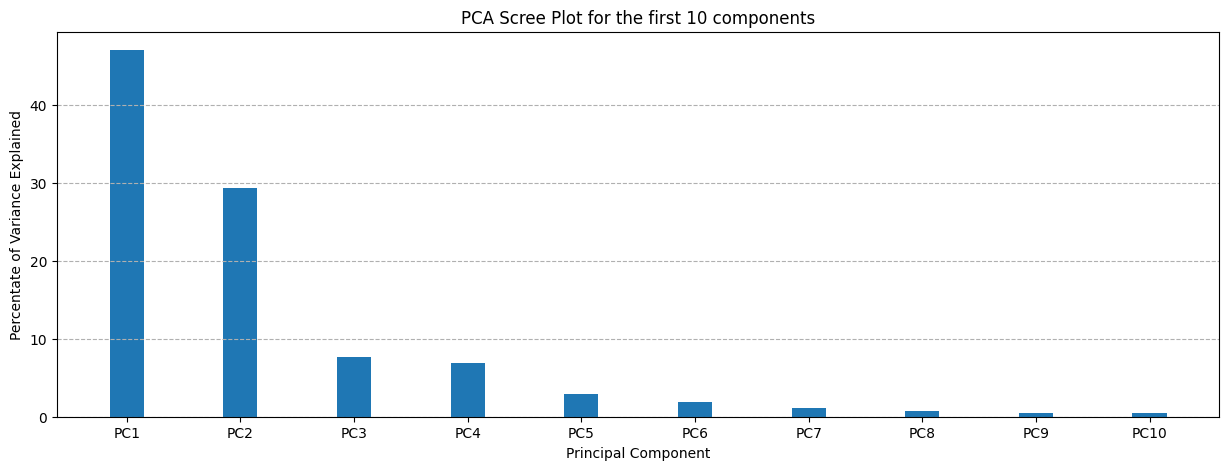

In [ ]:
n_com = 10
columns = ["PC%d"%(i+1) for i in range(0,n_com)]
plt.figure(figsize=(15, 5))
plt.bar(x= range(0,n_com), height=percent_variance[0:n_com], tick_label=columns,  width=0.3)
print("Cummulative varienec explained of the first 10 componants:","\n",np.cumsum(percent_variance[0:10]))
plt.grid(linestyle="--",axis="y")
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot for the first 10 components');

In [ ]:
pca_new=decomposition.PCA(n_components=3)
pca_new.fit(X)
X_reduced=pca_new.transform(X)

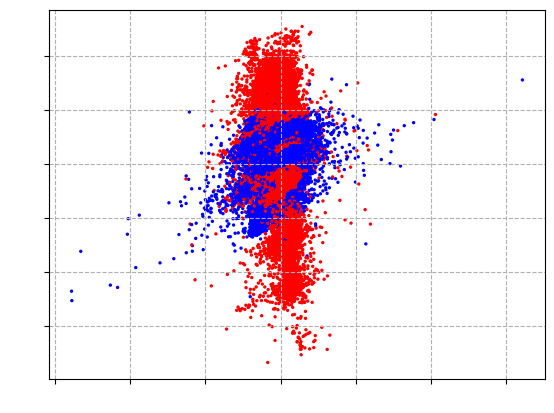

In [ ]:
cmap = mpl.colors.ListedColormap(['b','r'])
plt.scatter(X_reduced[:,0],X_reduced[:,1],c=Y.flatten(),s=2,cmap=cmap)
plt.grid(linestyle="--")
## hide x and y ticks
plt.xticks(color='w')
plt.yticks(color='w');

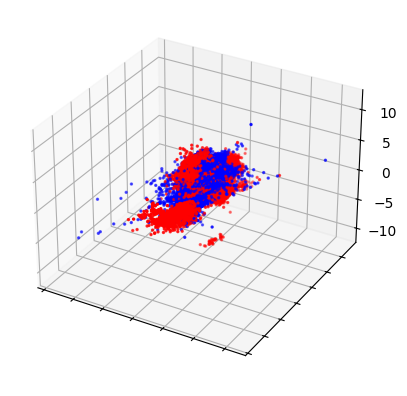

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X_reduced[:,0],X_reduced[:,1], X_reduced[:,2],c=Y.flatten(),s=2,cmap=cmap)
plt.xticks(color='w')
plt.yticks(color='w');

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y.flatten(), test_size=0.33)

In [ ]:
def ROC (tpr,fpr,roc_auc):
    plt.plot(tpr, fpr, color='r',label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([-0.01,1.01])
    plt.ylim([-0.01,1.01])
    #plt.xticks(np.arange(0,1.1,.1))
    #plt.yticks(np.arange(0,1.1,.1))
    plt.xlabel('False positive rate (1-Specificity)')
    plt.ylabel('True positive rate (Sensitivity)')
    plt.legend(loc="lower right")
    plt.grid();

## confusion matrix plot
def plot_cm(y_test, y_est):
    cm = confusion_matrix(y_test, y_est);
    accuracy = np.round(100*cm.diagonal().sum()/cm.sum(),2); error_rate = np.round(100-accuracy,2)
    plt.imshow(cm, cmap='binary', interpolation='None')
    plt.colorbar()
    plt.xlabel('Predicted class'); plt.ylabel('Actual class');
    plt.title('Confusion matrix (Accuracy: {0}%, Error Rate: {1}%)'.format(accuracy, error_rate))
    plt.show()

In [ ]:
classifiers = [
    RandomForestClassifier(n_estimators=100),
    LogisticRegression(solver='lbfgs',max_iter=1000), # without solver='lbfgs' it gives warning
    KNeighborsClassifier(3),
    MLPClassifier(activation='logistic',max_iter=1000),
    DecisionTreeClassifier()
    ]

classifiers_names=["RandomForest: \n",
                   "Logistic Regression: \n",
                   "K Nearest Neighbors: \n",
                   "Neural Networks: \n",
                   "Decision Tree: \n"]

In [ ]:
plt.style.use('seaborn-white')
k=1
i=0
for classifier in classifiers:
    model=classifier
    model.fit(X_train, y_train)

    class_rep = classification_report(y_test, model.predict(X_test))
    print(classifiers_names[i],class_rep)

    plt.figure(figsize=(5,5))
    plt.figure(k)
    plot_cm(y_test, model.predict(X_test))
    plt.show()

    p = model.predict_proba(X_test)[:,1]
    tpr=roc_curve(y_test,p)[0] # True Positive rate
    fpr=roc_curve(y_test,p)[1] # False Positive rate
    AUC=auc(tpr,fpr) # Area under Curve

    plt.figure(figsize=(4,4))
    plt.figure(k+1)
    ROC(tpr,fpr,AUC)
    plt.show()
    print("---------------------------------------------------------")
    print("\n")
    k+=2
    i+=1

OSError: 'seaborn-white' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

RandomForest: 
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     24747
         1.0       0.99      0.95      0.97     11370

    accuracy                           0.98     36117
   macro avg       0.98      0.97      0.98     36117
weighted avg       0.98      0.98      0.98     36117



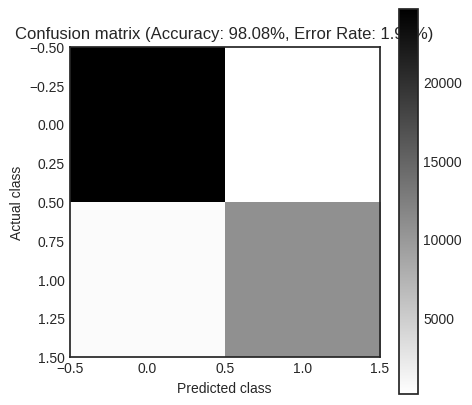

<Figure size 400x400 with 0 Axes>

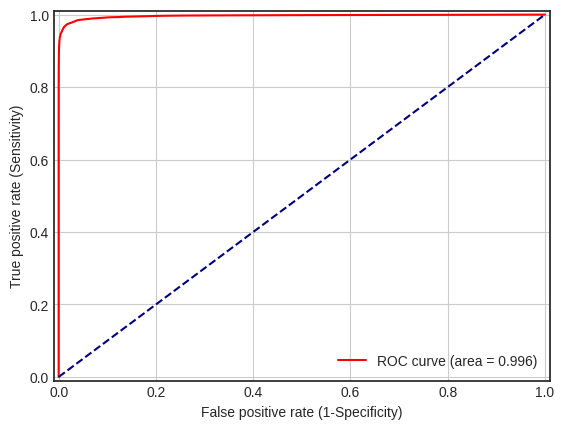

---------------------------------------------------------


Logistic Regression: 
               precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     24747
         1.0       0.84      0.68      0.75     11370

    accuracy                           0.86     36117
   macro avg       0.85      0.81      0.83     36117
weighted avg       0.86      0.86      0.85     36117



<Figure size 500x500 with 0 Axes>

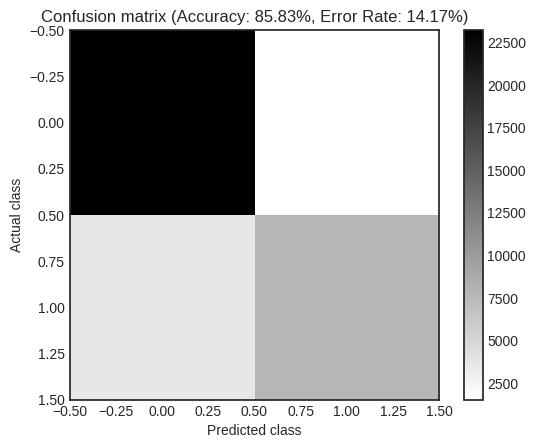

<Figure size 400x400 with 0 Axes>

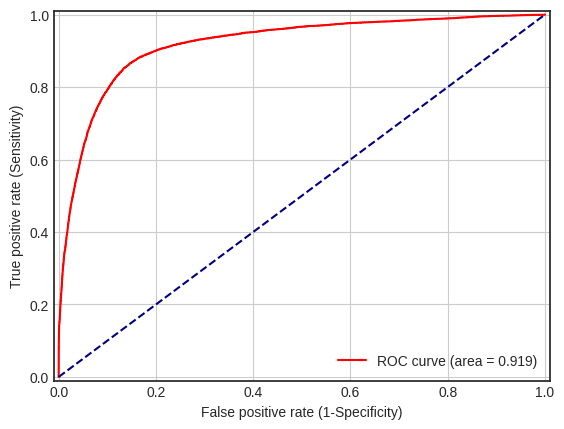

---------------------------------------------------------


K Nearest Neighbors: 
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     24747
         1.0       0.99      0.97      0.98     11370

    accuracy                           0.99     36117
   macro avg       0.99      0.98      0.98     36117
weighted avg       0.99      0.99      0.99     36117



<Figure size 500x500 with 0 Axes>

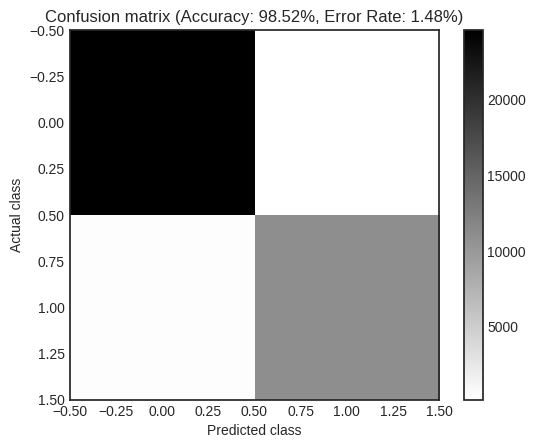

<Figure size 400x400 with 0 Axes>

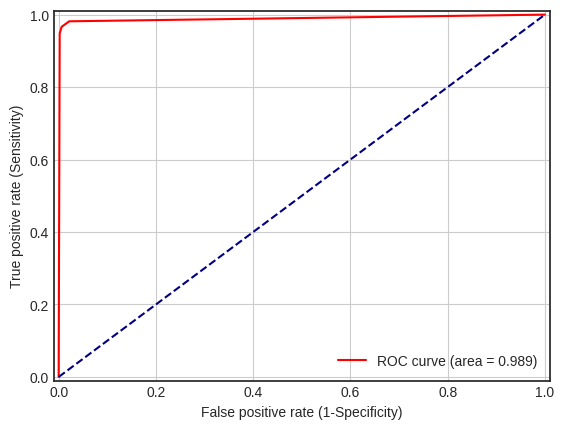

---------------------------------------------------------


Neural Networks: 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     24747
         1.0       0.99      0.98      0.98     11370

    accuracy                           0.99     36117
   macro avg       0.99      0.99      0.99     36117
weighted avg       0.99      0.99      0.99     36117



<Figure size 500x500 with 0 Axes>

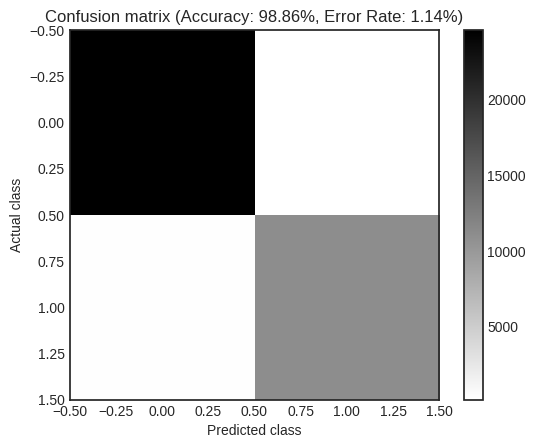

<Figure size 400x400 with 0 Axes>

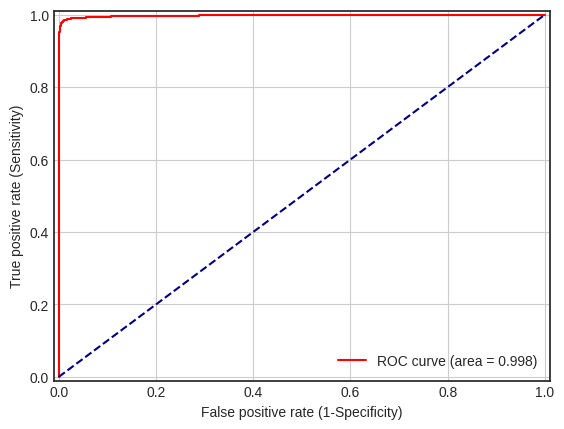

---------------------------------------------------------


Decision Tree: 
               precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     24747
         1.0       0.94      0.94      0.94     11370

    accuracy                           0.96     36117
   macro avg       0.95      0.96      0.95     36117
weighted avg       0.96      0.96      0.96     36117



<Figure size 500x500 with 0 Axes>

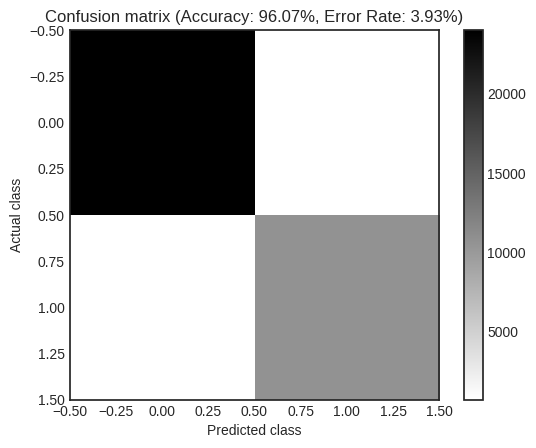

<Figure size 400x400 with 0 Axes>

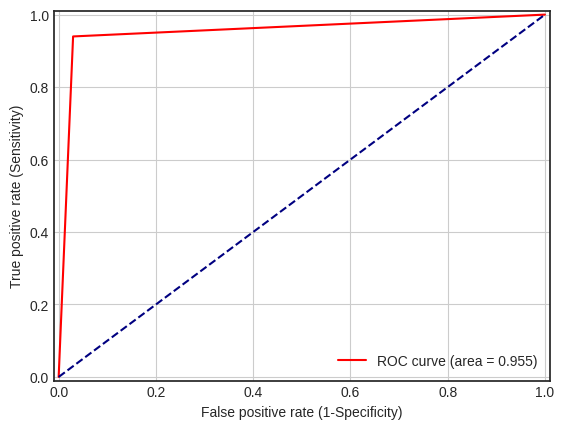

---------------------------------------------------------




In [ ]:
plt.style.use('seaborn-v0_8-white')
k=1
i=0
for classifier in classifiers:
    model=classifier
    model.fit(X_train, y_train)

    class_rep = classification_report(y_test, model.predict(X_test))
    print(classifiers_names[i],class_rep)

    plt.figure(figsize=(5,5))
    plt.figure(k)
    plot_cm(y_test, model.predict(X_test))
    plt.show()

    p = model.predict_proba(X_test)[:,1]
    tpr=roc_curve(y_test,p)[0] # True Positive rate
    fpr=roc_curve(y_test,p)[1] # False Positive rate
    AUC=auc(tpr,fpr) # Area under Curve

    plt.figure(figsize=(4,4))
    plt.figure(k+1)
    ROC(tpr,fpr,AUC)
    plt.show()
    print("---------------------------------------------------------")
    print("\n")
    k+=2
    i+=1

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 176, 32)        │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 88, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 84, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 42, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2688)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       344,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 354,817 (1.35 MB)

 Trainable params: 354,817 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9607 - loss: 0.1595 - val_accuracy: 0.9889 - val_loss: 0.0440
Epoch 2/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9895 - loss: 0.0415 - val_accuracy: 0.9907 - val_loss: 0.0354
Epoch 3/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9921 - loss: 0.0266 - val_accuracy: 0.9889 - val_loss: 0.0410
Epoch 4/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9917 - loss: 0.0339 - val_accuracy: 0.9919 - val_loss: 0.0284
Epoch 5/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9925 - loss: 0.0290 - val_accuracy: 0.9936 - val_loss: 0.0248
Epoch 6/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9952 - loss: 0.0187 - val_accuracy: 0.9942 - val_loss: 0.0242
Epoch 7/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9938 - loss: 0.0188 - val_accuracy: 0.9919 - val_loss: 0.0282
Epoch 8/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9955 - loss: 0.0142 - val_acc

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1288
           1       1.00      0.98      0.99       859

    accuracy                           0.99      2147
   macro avg       0.99      0.99      0.99      2147
weighted avg       0.99      0.99      0.99      2147



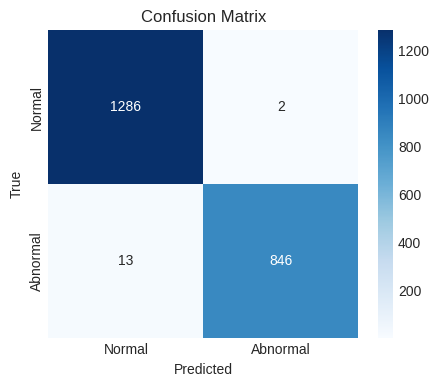

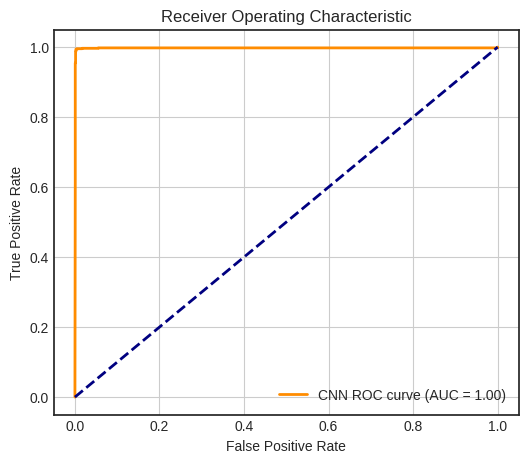

In [45]:
# STEP 1: Install wfdb if not already installed
!pip install wfdb

# STEP 2: Import libraries
import wfdb
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# STEP 3: Load and process ECG beats
pts = ['100', '101', '102', '103', '104']  # Add more as needed
X = []
y = []

window_size = 180  # 90 samples before and after R-peak

for pt in pts:
    record = wfdb.rdrecord(pt)                     # No data_path
    annotation = wfdb.rdann(pt, 'atr')
    signal = record.p_signal[:, 0]  # Use lead 0

    for i, r_peak in enumerate(annotation.sample):
        if r_peak - 90 < 0 or r_peak + 90 >= len(signal):
            continue
        beat = signal[r_peak - 90 : r_peak + 90]
        label = annotation.symbol[i]
        if label == 'N':
            y.append(0)  # Normal
            X.append(beat)
        else:
            y.append(1)  # Abnormal
            X.append(beat)

X = np.array(X)
y = np.array(y)

# STEP 4: Preprocess data
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = X.reshape((X.shape[0], X.shape[1], 1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# STEP 5: Build CNN model
model = Sequential([
    Conv1D(32, 5, activation='relu', input_shape=(X.shape[1], 1)),
    MaxPooling1D(2),
    Conv1D(64, 5, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# STEP 6: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

model.save("cnn_model.h5")

# STEP 7: Evaluate the model
y_pred_probs = model.predict(X_test).flatten()
y_pred = (y_pred_probs > 0.5).astype(int)

print("Classification Report:\n", classification_report(y_test, y_pred))

# STEP 8: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Abnormal"], yticklabels=["Normal", "Abnormal"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# STEP 9: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='CNN ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
# STEP 1: Upload the .txt file
from google.colab import files
uploaded = files.upload()


Saving high1.txt to high1.txt
Saving high2.txt to high2 (1).txt
Saving trial.2.txt to trial.2.txt
Saving 1.1.txt to 1.1.txt
Saving 2.2.txt to 2.2.txt
Saving trial.1.txt to trial.1.txt
Saving 2.1.txt to 2.1.txt
Saving 1.2.txt to 1.2.txt


In [54]:
# STEP 1: Install dependencies (if needed)
!pip install wfdb

# STEP 2: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler

# STEP 3: Load ECG from high2.txt
ecg_values = []

with open("/content/2.2.txt", "r") as file:
    for line in file:
        if line.startswith("#") or not line.strip():
            continue  # Skip headers and empty lines
        parts = line.strip().split('\t')
        if len(parts) >= 2:  # Make sure ECG column exists
            try:
                ecg_val = float(parts[1])  # ECG is the 2nd column
                ecg_values.append(ecg_val)
            except ValueError:
                continue  # Skip lines that don't parse correctly

ecg_signal = np.array(ecg_values)
print(f"Loaded ECG signal with {len(ecg_signal)} samples.")


Loaded ECG signal with 5322 samples.


In [55]:
# Choose center of the signal
start = len(ecg_signal) // 2 - 90
end = start + 180
if start < 0 or end > len(ecg_signal):
    raise ValueError("Signal is too short for 180-sample beat extraction.")

beat = ecg_signal[start:end]


In [56]:
# Normalize using StandardScaler (if you saved your scaler, load it)
scaler = StandardScaler()
beat_scaled = scaler.fit_transform(beat.reshape(-1, 1)).reshape(1, 180, 1)


In [57]:
# Load the model
model = load_model("cnn_model.h5")

# Predict
prob = model.predict(beat_scaled)[0][0]
label = "Normal" if prob < 0.5 else "Abnormal"

print(f"✅ Prediction: {label}")
print(f"🔍 Confidence Score: {prob:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
✅ Prediction: Normal
🔍 Confidence Score: 0.0010
